In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

### 2.1.Read Data using the Pandas Dataframe

In [5]:
cols = ["x", "y", "Klasse"]
df =  pd.read_csv('Cluster_Data_1.csv',delimiter=' ', names = cols)
df.head()

,x,y,Klasse
0,8.865398,-0.136393,1
1,6.872300,-2.109774,1
2,8.789581,-1.426713,1
3,8.762244,-1.347550,1
4,8.166337,-0.500600,1


### 2.2. Determine the Number of Classes


In [6]:
k = len(df["Klasse"].unique())
k

5

### 2.3. Visualise the Data
Best to use a scatterplot to better visualize the data.

* [matplotlib.pyplot.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)
* [matplotlib.axes.Axes.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html)

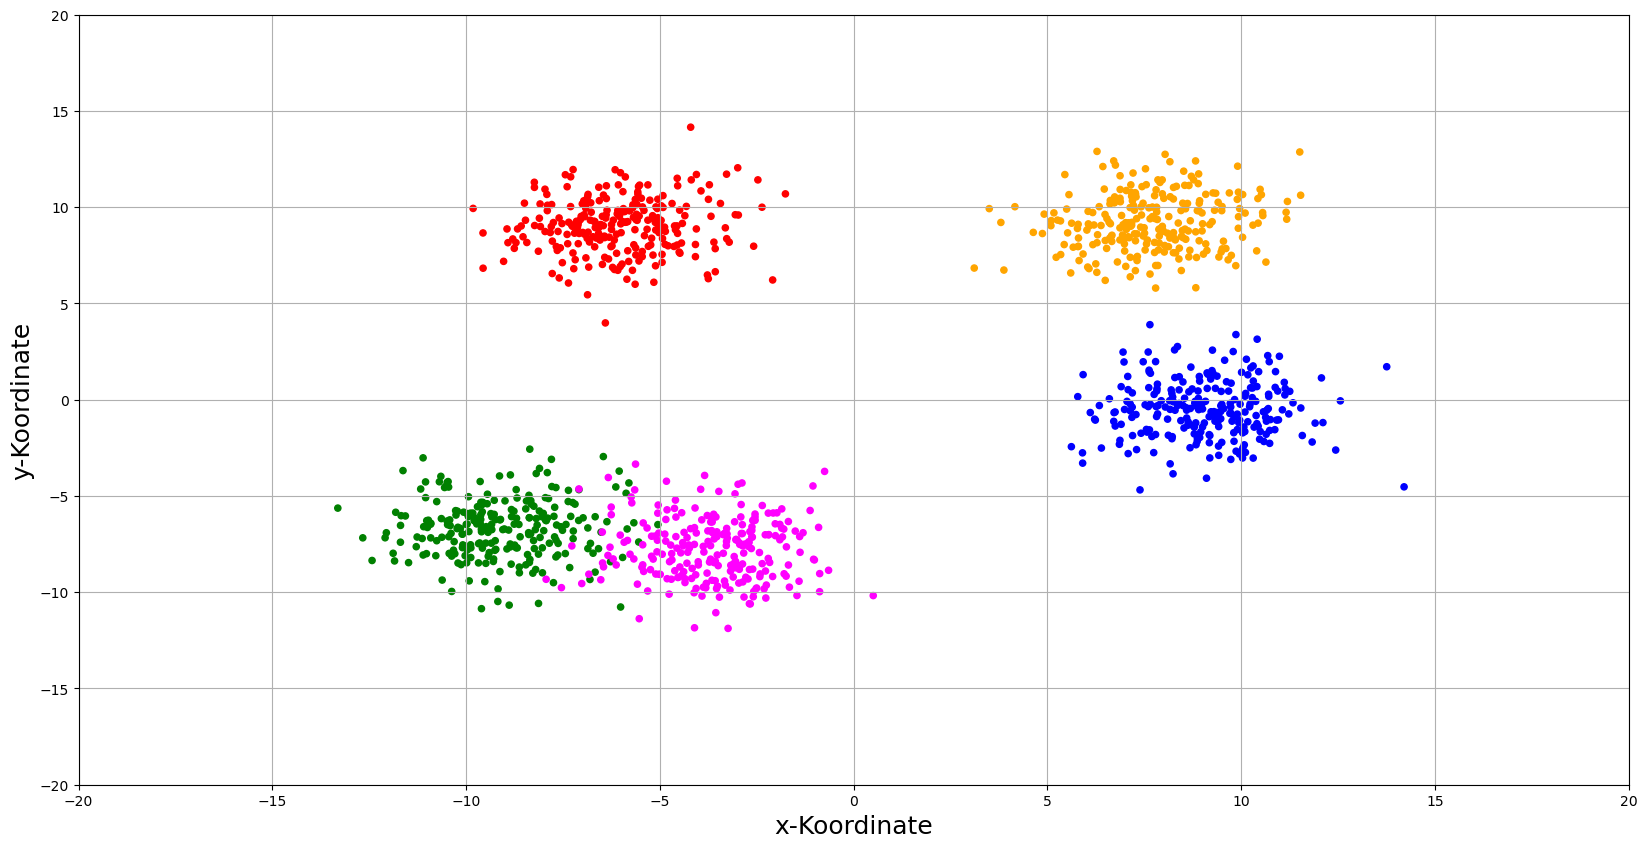

In [10]:

color_dict = {'blue'  :1,
              'orange':2,
              'green' :3,
              'red'   :4,
              'magenta':5
              }
cmap = ListedColormap(color_dict)
def plot_cluster(data, num_clusters):
    fig, ax = plt.subplots()
    x = data[data["Klasse"]<=num_clusters]["x"] #begrenzt die Anzahl der Cluster 
    y = data[data["Klasse"]<=num_clusters]["y"]#begrenzt die Anzahl der Cluster 
    klasse = data[data["Klasse"]<=num_clusters]["Klasse"]#begrenzt die Anzahl der Cluster 
    plt.rcParams['figure.figsize'] = (20,10)
    plt.xlim(-20,20)
    plt.ylim(-20,20)
    plt.grid()
    plt.xlabel('x-Koordinate', fontsize=18)
    plt.ylabel('y-Koordinate', fontsize=18)
    plt.scatter(x,y,s=20, c = klasse, cmap = cmap)
    plt.show()
plot_cluster(df,k)


### 2.4. Implement the Euclidean Distance


In [11]:
def euclidian_distance(point_1, point_2):
    distance = 0
    for i in range(len(point_1)):
        distance += (point_1[i] - point_2[i])**2
    return distance**0.5

### 2.5. Implement the K nearest Neighbor Algorithm

In [12]:
def k_nearest_neighbour(new_point, data, k):
    g = data.copy()
    g['Euclidian'] = data.apply(lambda row: euclidian_distance([row['x'], row['y']],new_point), axis=1) 
    g = g.sort_values(by='Euclidian')
    knn = g[:k]
    new_class = np.bincount(knn['Klasse']) #zählt die Vorkommen jeder Klasse
    return np.argmax(new_class)#gibt die am häufigsten vorkommende Klasse an

### 2.6. Determine the class of the new Point

In [ ]:
df.loc[len(df)] =  np.array([0,0,0]) # create a new row in the dataset for the new point

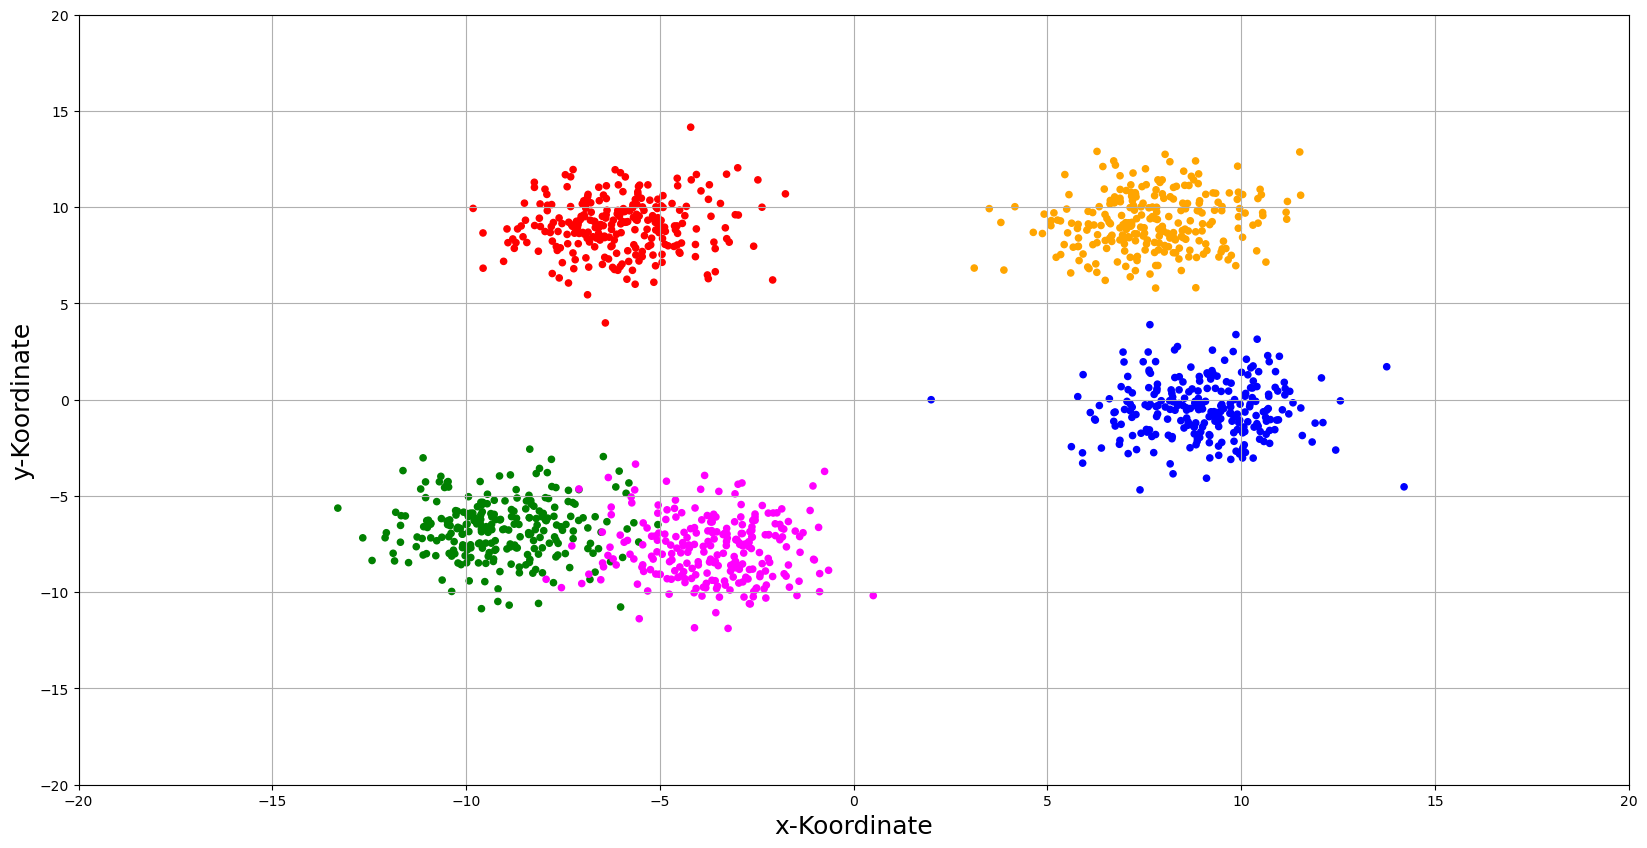

In [13]:
p = np.array([2,0]) #coordinates of new point

klasse = k_nearest_neighbour(p, df, 1) # use the KNN to find the corresponding class

#Insert Coordinates and Class of new point in the dataset
df.loc[len(df)-1, ['x', 'y']] = [p[0],p[1]] 
df.at[len(df)-1, 'Klasse'] = klasse 

plot_cluster(df,k)